# XGBoost

### Importamos las librerías

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
import xgboost as xgb

### Leemos los archivos

In [2]:
df_train_labels = pd.read_csv('./../datasets/train_labels.csv')
df_train_values = pd.read_csv('./../datasets/train_values_FE.csv')

#### Eliminamos el building id para pdoer hacer las predicciones

In [4]:
df_train_labels_filtrados = df_train_labels.drop(['building_id'], axis=1)
df_train_values_filtrados = df_train_values.drop(['building_id'], axis=1)
#df_train_labels_filtrados['damage_grade'] = df_train_labels_filtrados['damage_grade'] - 1
df_train_labels_filtrados

,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
260596,2
260597,3
260598,3
260599,2


#### Implementamos el algoritmo

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train_values_filtrados, df_train_labels_filtrados, test_size=0.3, random_state=123)

In [104]:
xg_reg = xgb.XGBClassifier(
    objective ='multi:softprob',
    n_estimators = 400,
    max_depth = 7,
    learning_rate = 0.01,
    subsample = 0.5,
    n_iter_no_change = 50
)

In [105]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xg_reg.fit(X_train, y_train, early_stopping_rounds=80, eval_metric=["merror", "mlogloss", "auc"], eval_set=eval_set, verbose=True)

/home/nahuel/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nahuel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:36:27] WARNING: ../src/learner.cc:573: 
Parameters: { "n_iter_no_change" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-merror:0.32957	validation_0-mlogloss:1.09376	validation_0-auc:0.73957	validation_1-merror:0.33147	validation_1-mlogloss:1.09373	validation_1-auc:0.73884
[1]	validation_0-merror:0.32648	validation_0-mlogloss:1.08896	validation_0-auc:0.74091	validation_1-merror:0.32816	validation_1-mlogloss:1.08893	validation_1-auc:0.74016
[2]	validation_0-merror:0.32607	validation_0-mlogloss:1.08424	validation_0-auc:0.74151	validation_1-merror:0.32799	validation_1-mlogloss:1.08422	validation_1-auc:0.74082
[3]	validation_0-merror:0.32750	validation_0-mlogloss:1.07960	validation_0-auc:0.74156	validation_1-merror:0.32865	validation_1-mlogloss:1.07956	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_iter_no_change=50, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
preds = xg_reg.predict(X_test)

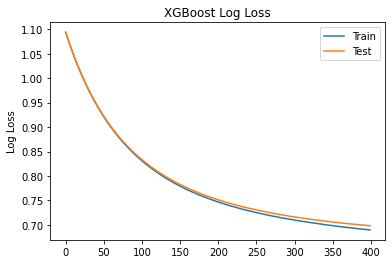

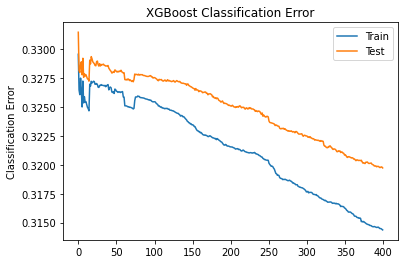

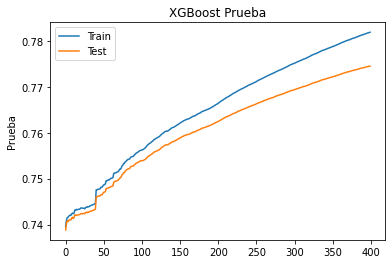

In [107]:
# retrieve performance metrics
results = xg_reg.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

# plot prueba
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('Prueba')
plt.title('XGBoost Prueba')
plt.show()

In [108]:
error = f1_score(y_test, preds, average='micro')
error

0.6802675841956486

### Error de entrenamiento

In [83]:
xg_reg.score(X_train, y_train)

0.7334612432847275

### Error de generalización o testing

In [84]:
xg_reg.score(X_test, y_test)

0.6979189317097505